In [68]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [69]:
import pandas as pd

In [70]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
#칼럼 별 결측치 개수 세기

# df[df.Age.isna()]

df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
na_sum = df.isna().sum()
na_cols = na_sum[na_sum > 1]

na_cols.index

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [74]:
df.drop(columns=na_cols.index) #df 원본값 유지

# df.drop(columns=na_cols.index, inplace=True) #df 원본값 변경

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


In [75]:
# backup_df = df #메모리 주소 전달 (새로운 값 생성 X) "얕은복사"
# backup_df = df[:] # "깊은복사"

# df.drop(columns=['Age', 'Cabin', 'Embarked'], inplace=True)
# backup_df #inplace 적용됨.

# backup_df = df.copy() # 값 복사O

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 결측치 대응
---
- 결측치가 존재하는 Age, Cabin, Embarked에 대해 대응

### 결측치 대응 1: Age


In [78]:
df.Age.median()

np.float64(28.0)

In [79]:
df["Age"] = df.Age.fillna(df.Age.mean())

In [80]:
df.Age.isna().sum() #결측치 채움 확인인

np.int64(0)

### 결측치 대응 2: Cabin

In [81]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [82]:
df.drop(["Cabin"], axis=1, inplace=True)

### 결측치 대응 3: Embarked

In [83]:
df.Embarked.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [84]:
df = df[~df.Embarked.isna()]

In [85]:
df.isna().sum().sum()

np.int64(0)

## 통계치 확인
---

In [86]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [87]:
df["Sex"] = df.Sex.map({"male": 1, "female": 0})

In [88]:
# df.Age.describe()
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
df.Ticket.value_counts()

Ticket
347082             7
1601               7
CA. 2343           7
CA 2144            6
347088             6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369             1
113788             1
Name: count, Length: 680, dtype: int64

In [90]:
df.query("Ticket == '347082'")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",1,39.0,1,5,347082,31.275,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",0,2.0,4,2,347082,31.275,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",0,9.0,4,2,347082,31.275,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",0,11.0,4,2,347082,31.275,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",0,39.0,1,5,347082,31.275,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",0,6.0,4,2,347082,31.275,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",1,4.0,4,2,347082,31.275,S


In [91]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
# df["Age"]
df.Age
df[["PassengerId", "Age"]]

,PassengerId,Age
0,1,22.000000
1,2,38.000000
2,3,26.000000
3,4,35.000000
4,5,35.000000
...,...,...
886,887,27.000000
887,888,19.000000
888,889,29.699118
889,890,26.000000


In [93]:
df.select_dtypes(include=["number"])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,7.2500
1,2,1,1,0,38.000000,1,0,71.2833
2,3,1,3,0,26.000000,0,0,7.9250
3,4,1,1,0,35.000000,1,0,53.1000
4,5,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000
887,888,1,1,0,19.000000,0,0,30.0000
888,889,0,3,0,29.699118,1,2,23.4500
889,890,1,1,1,26.000000,0,0,30.0000


## 상관계수
---

In [94]:
df_corr = df.corr(numeric_only=True)


In [95]:
pip install seaborn -q

Note: you may need to restart the kernel to use updated packages.


In [96]:
import seaborn as sns

<Axes: >

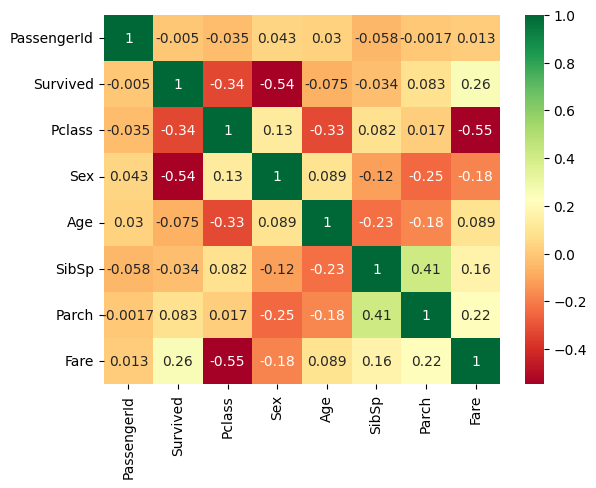

In [97]:
sns.heatmap(df_corr, annot=True, cmap="RdYlGn")

# 생존('Survived')과 가장 밀접한 관계에 있는 것이 성별('SEX')이다.

In [98]:
df_corr.sort_values('Survived', key=abs, ascending=False).tail(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Age,0.030300,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887
PassengerId,1.000000,-0.005028,-0.035330,0.043136,0.030300,-0.057686,-0.001657,0.012703


In [99]:
df_corr.sort_values("Survived", key=abs, ascending=False).iloc[1:].head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Sex,0.043136,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958
Pclass,-0.035330,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193
Fare,0.012703,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000
Parch,-0.001657,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532
Age,0.030300,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604


### 상관계수 확인을 통한 인사이트 정리
- 여성의 경우 생존의 확률이 남서에 비해 비교적으로 높음
- 좋은 객실에 탑승한 경우 생존 확률이 높음
- 나이가 정규분포에서 끝단일 경우 생존확률이 높을 것 같으나 이것은 상관계수로 직접적인 확인이 불가하므로 시각화가 필요함
  > 10살 단위로 구분하여 나이대별 생존률 계산 결과, 연령대 별로 높은 클래스에 탑승한 승객의 생존률이 대체로 높음. <br/>
  > 그러나 0-9세의 경우 2등급 클래스 객실 승객들의 생존률이 높은 것으로 나타남. <br/>
  > 나이 결측치를 평균으로 채워 스파이크가 발생하는 등 데이터의 신뢰성이 떨어지므로, 결측치 재처리가 필요.

In [100]:
pip install matplotlib -q

Note: you may need to restart the kernel to use updated packages.


In [101]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Survival Rate')

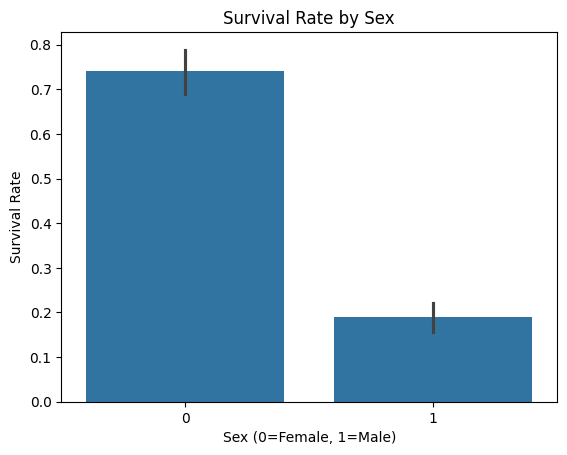

In [102]:
sns.barplot(data=df, x="Sex", y="Survived")
plt.title("Survival Rate by Sex")
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Survival Rate')

<Axes: xlabel='Pclass', ylabel='Survived'>

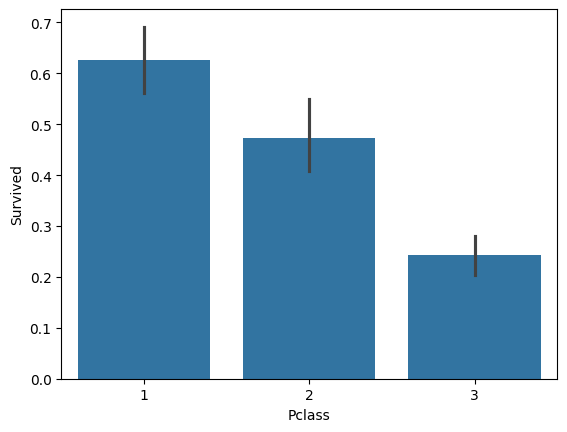

In [103]:
sns.barplot(data=df, x="Pclass", y="Survived")
# plt.title("Survived Rate by Pclass")
# plt.xlabel('Pclass')
# plt.ylabel('Survived Rate')

<Axes: xlabel='Sex', ylabel='Survived'>

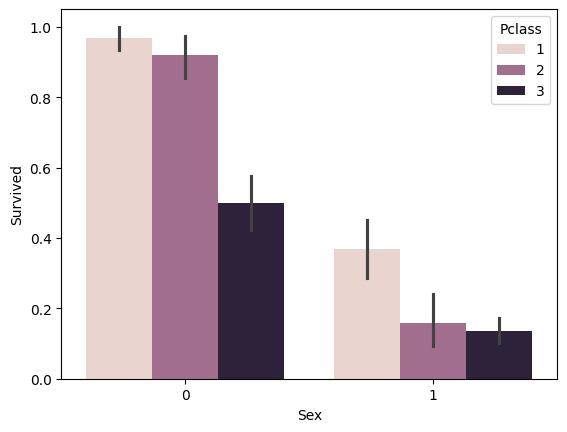

In [104]:
# 성별, 생존, 객실

sns.barplot(data=df, x='Sex', y='Survived', hue='Pclass')
# grouped = df.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()
# sns.barplot(data=grouped, x='Sex', y='Survived', hue='Pclass')

# plt.title('Survival Rate by Sex and Pclass')
# plt.ylabel('Survival Rate')
# plt.ylim(0, 1)
# plt.grid(axis='y')

<Axes: xlabel='Age', ylabel='Count'>

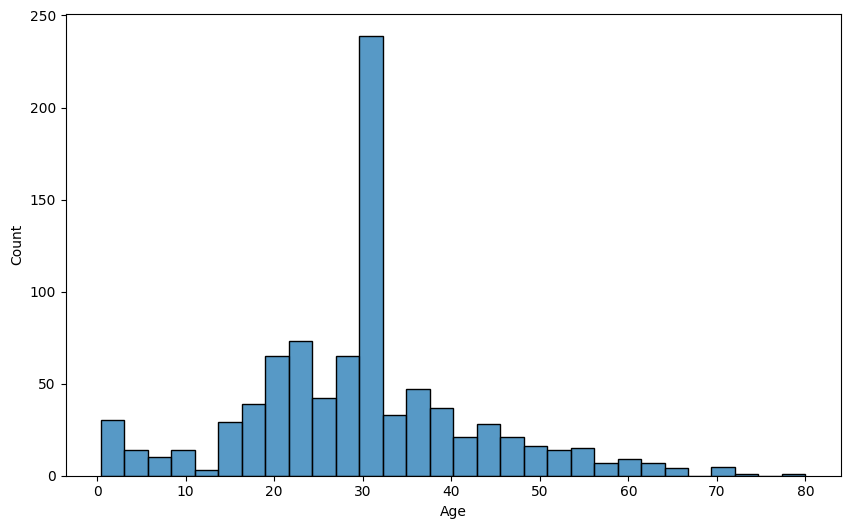

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", bins=30) 

#결측치를 평균으로 채웠기 때문에 스파이크 발생

<Axes: xlabel='AgeGroup', ylabel='Survived'>

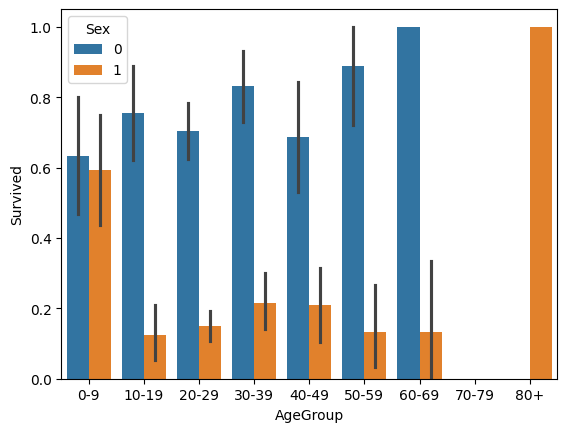

In [134]:
#각 나이대 구간 별로 생존율

# 새로운 칼럼 만들기
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

sns.barplot(data=df, x='AgeGroup', y='Survived', hue="Sex")

<Axes: xlabel='Age_Group', ylabel='Survived'>

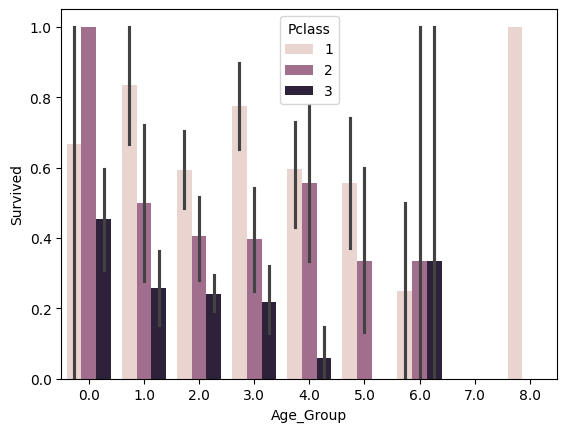

In [142]:
df['Age_Group'] = df.Age // 10

# df.drop(columns=['AgeGroup'], inplace=True)

sns.barplot(data=df, x='Age_Group', y='Survived', hue="Pclass")


In [140]:
# df.Age.max()
# df_70plus = df[df['AgeGroup'] == '70-79' | df['AgeGroup'] == '80']

df_70plus = df[(df['Age_Group'] == 7) | (df['Age_Group'] == 8)]
df_70plus[['Survived', 'Age_Group']]


,Survived,Age_Group
96,0,7.0
116,0,7.0
493,0,7.0
630,1,8.0
672,0,7.0
745,0,7.0
851,0,7.0


In [144]:
df2 = pd.read_csv("./titanic.csv") 

In [148]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,3.0


In [ ]:
df2.Name.str.split(",")[1]
# df2.Name.str.split(",").iloc[1]

['Cumings', ' Mrs. John Bradley (Florence Briggs Thayer)']

In [ ]:
df2["Title"] = df2.Name.str.split(", ").str[1].str.split(".").str[0]

In [180]:
df2.loc[~df2["Title"].isin(["Mr", "Miss", "Mrs", "Master"]), "Title"] = "Other"
df2.Title.value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64

In [235]:
df.columns = df.columns.str.lower()
df.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [239]:
def get_titanic_data(path="titanic.csv"):
    df = pd.read_csv(path)
    df.columns = df.columns.str.lower()
    return df

def get_preprocessed_data(df):
    df.drop(columns=["cabin"], inplace=True)
    df.dropna(subset=["embarked"], inplace=True)
    df["title"] = df.name.str.split(", ").str[1].str.split(".").str[0]
    df.loc[~df.title.isin(['Mr', 'Miss', 'Mrs', 'Master']), 'title'] = 'Other'
    df["age"] = df.age.fillna(df.groupby(["title", "pclass", "sex", "survived"]).age.transform("median"))
    df.drop(columns=["embarked"], inplace=True)
    df["family_size"] = df.parch + df.sibsp
    df["is_alone"] = df.family_size == 0
    df.drop(columns=["name", "ticket", "passengerid"], inplace=True)
    return df

df = get_titanic_data()
df = get_preprocessed_data(df)
df

,survived,pclass,sex,age,sibsp,parch,fare,title,family_size,is_alone
0,0,3,male,22.0,1,0,7.2500,Mr,1,False
1,1,1,female,38.0,1,0,71.2833,Mrs,1,False
2,1,3,female,26.0,0,0,7.9250,Miss,0,True
3,1,1,female,35.0,1,0,53.1000,Mrs,1,False
4,0,3,male,35.0,0,0,8.0500,Mr,0,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Other,0,True
887,1,1,female,19.0,0,0,30.0000,Miss,0,True
888,0,3,female,18.0,1,2,23.4500,Miss,3,False
889,1,1,male,26.0,0,0,30.0000,Mr,0,True


In [ ]:
# title, sex, pclass, survived 나이 평균

male = df[df["Sex"]=="male"]["Age"].mean()
female = df[df["Sex"]=="female"]["Age"].mean()

class1 = df[df["Pclass"]==1]["Age"].mean()
class2 = df[df["Pclass"]==2]["Age"].mean()
class3 = df[df["Pclass"]==3]["Age"].mean()

Mr = df[df["Title"]=="Mr"]["Age"].mean()
#등등

male, female, class1, class2, class3

(np.float64(30.72664459161148),
 np.float64(27.745173745173744),
 np.float64(38.10554347826087),
 np.float64(29.87763005780347),
 np.float64(25.14061971830986))

In [194]:
# df.groupby(["Sex"]).mean(numeric_only=True)
df.groupby(["Sex"]).describe()

PassengerId                                                             \
             count        mean         std  min     25%    50%     75%    max   
Sex                                                                             
female       312.0  430.932692  255.821340  2.0  233.25  414.5  639.75  889.0   
male         577.0  454.147314  257.486139  1.0  222.00  464.0  680.00  891.0   

       Survived            ... Parch        Fare                              \
          count      mean  ...   75%  max  count       mean        std   min   
Sex                        ...                                                 
female    312.0  0.740385  ...   1.0  6.0  312.0  44.252124  58.113672  6.75   
male      577.0  0.188908  ...   0.0  5.0  577.0  25.523893  43.138263  0.00   

                                           
              25%   50%     75%       max  
Sex                                        
female  11.810425  23.0  53.575  512.3292  
male     7.895800  10.5  26.550  512.3292  

[2 rows x 56 columns]

In [192]:
df.groupby(["Title", "Sex", "Pclass", "Survived"]).Age.mean()

Title   Sex     Pclass  Survived
Master  male    1       1            5.306667
                2       1            2.258889
                3       0            5.400000
                        1            5.268889
Miss    female  1       0           26.000000
                        1           30.000000
                2       0           31.000000
                        1           21.816667
                3       0           17.810811
                        1           14.171875
Mr      male    1       0           44.045455
                        1           37.343750
                2       0           32.460526
                        1           36.666667
                3       0           28.895000
                        1           27.551724
Mrs     female  1       0           25.000000
                        1           40.718750
                2       0           38.500000
                        1           33.162162
                3       0           36.166667
 

In [ ]:
df['Age'] = df.Age.fillna(df.groupby(["Title", "Pclass", "Sex", "Survived"]).Age.transform("median"))#.plot(kind="hist", bins=40)

<Axes: xlabel='Embarked', ylabel='Survived'>

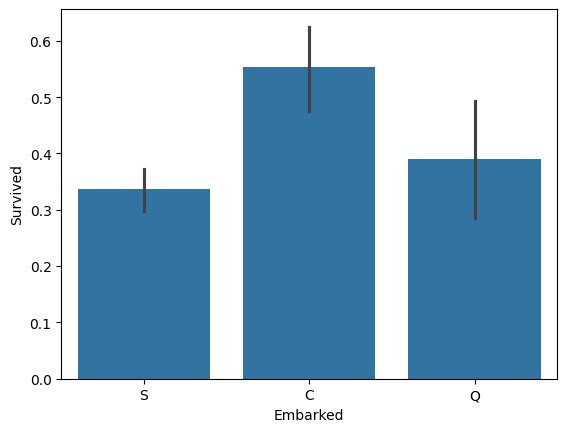

In [ ]:
# Embarked 쓸모 : 생존이랑 상관계수

df['Embarked'].unique()
df.groupby('Embarked').Survived.mean()

sns.barplot(data=df, x='Embarked', y='Survived')

In [216]:
# 탑승지역과 성별 / 탑승지역과 클래스등급

df.groupby(['Embarked']).Age.mean()

Embarked
C    30.675119
Q    24.025974
S    29.362189
Name: Age, dtype: float64

In [215]:
df.groupby(['Embarked']).Pclass.mean()

Embarked
C    1.886905
Q    2.909091
S    2.350932
Name: Pclass, dtype: float64

C에서 탑승한 승객들의 생존률이 가장 높음
- 해당 지역에 사는 승객들의 특징은 연령대가 평균 30대이며
- 객실 등급 평균이 1.8로 나타남.

결론 : Embarked와 생존률은 큰 관계성이 없지만, 해당 데이터를 통해 지역의 특성을 유추해볼 수 있음.

In [217]:
df.drop(columns=["Embarked"], inplace=True)

In [219]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Mr


In [ ]:
df["Family_Size"] = df.SibSp + df.Parch

In [221]:
df["is_alone"] = df.Family_Size == 0 

In [222]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Title,Family_Size,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Mr,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Mrs,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Miss,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Mrs,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Mr,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Other,0,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,Miss,0,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,Miss,3,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,Mr,0,True


In [241]:
df.groupby(["pclass"]).fare.describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,214.0,84.193516,78.746457,0.0,30.77185,58.6896,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


<Axes: xlabel='family_size', ylabel='survived'>

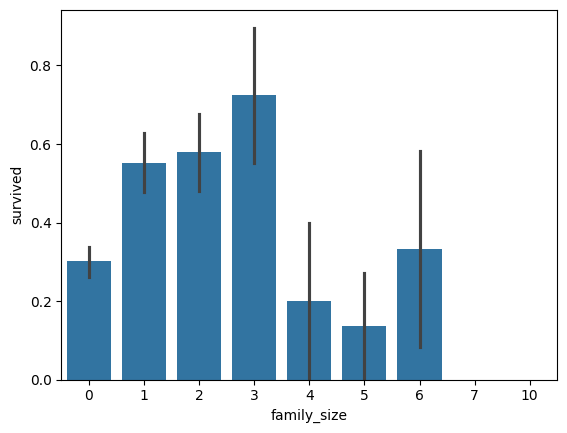

In [243]:
sns.barplot(data=df, x="family_size", y="survived")

In [254]:
df[(df["family_size"] > 0) & (df["title"] == "Mr") & (df["survived"] == 1)]

,survived,pclass,sex,age,sibsp,parch,fare,title,family_size,is_alone
97,1,1,male,23.0,0,1,63.3583,Mr,1,False
224,1,1,male,38.0,1,0,90.0000,Mr,1,False
248,1,1,male,37.0,1,1,52.5542,Mr,2,False
267,1,3,male,25.0,1,0,7.7750,Mr,1,False
301,1,3,male,27.0,2,0,23.2500,Mr,2,False
370,1,1,male,25.0,1,0,55.4417,Mr,1,False
390,1,1,male,36.0,1,2,120.0000,Mr,3,False
453,1,1,male,49.0,1,0,89.1042,Mr,1,False
484,1,1,male,25.0,1,0,91.0792,Mr,1,False
543,1,2,male,32.0,1,0,26.0000,Mr,1,False


<Axes: xlabel='is_alone', ylabel='survived'>

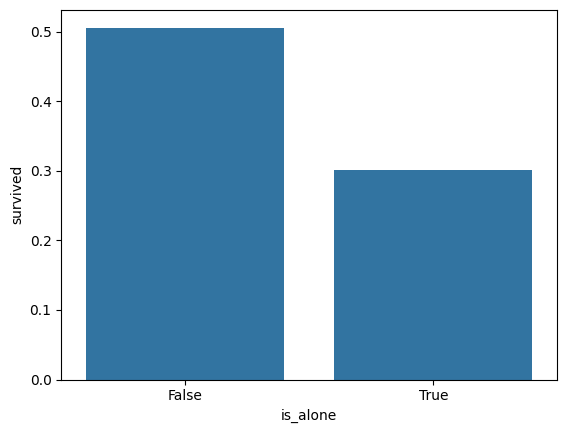

In [257]:
sns.barplot(data=df, x="is_alone", y="survived", errorbar=None)

<Axes: xlabel='title', ylabel='survived'>

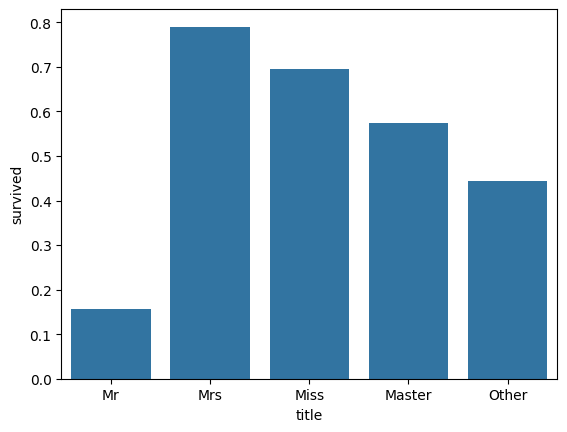

In [256]:
sns.barplot(data=df, x="title", y="survived", errorbar=None)

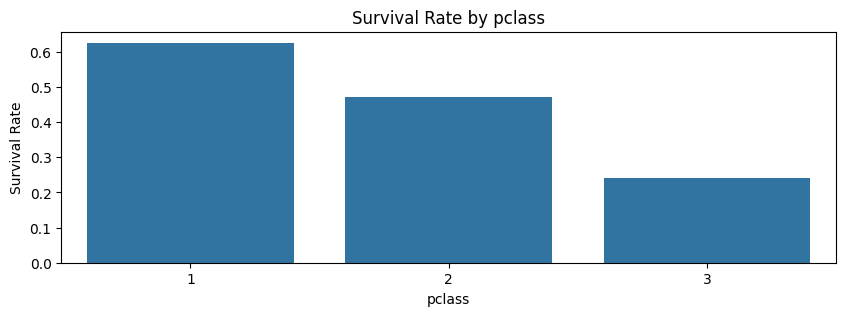

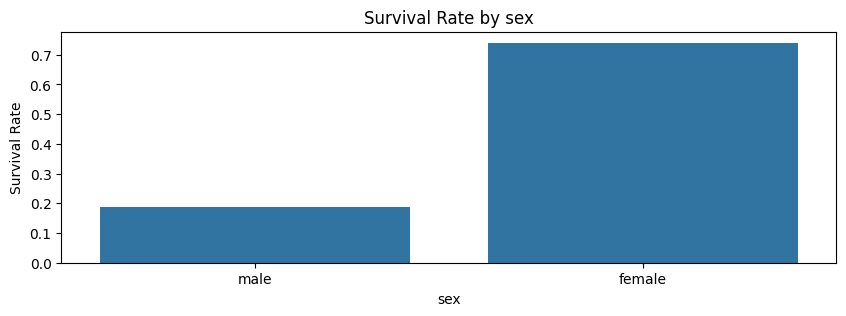

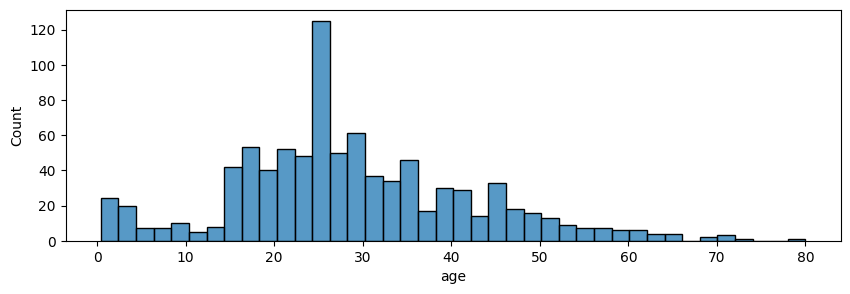

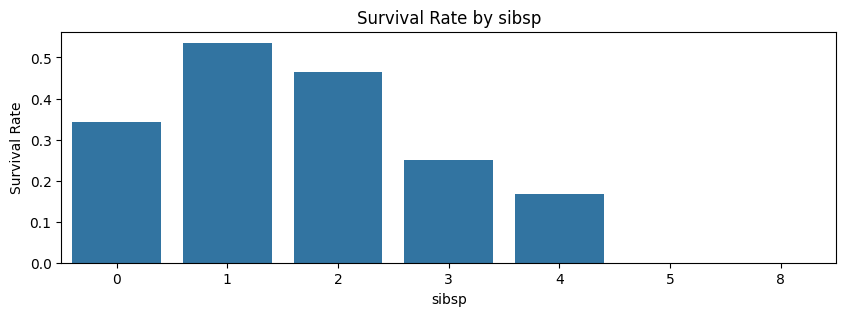

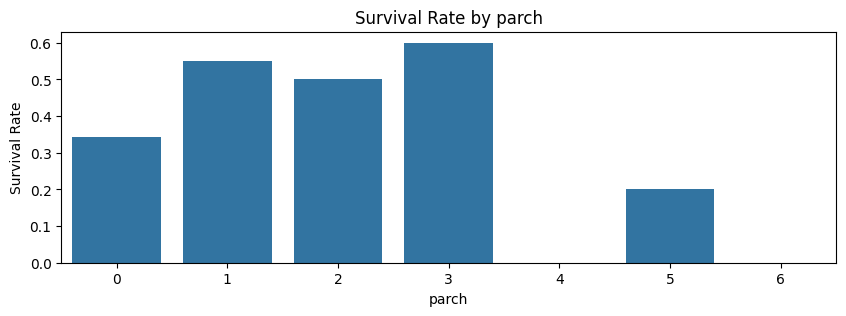

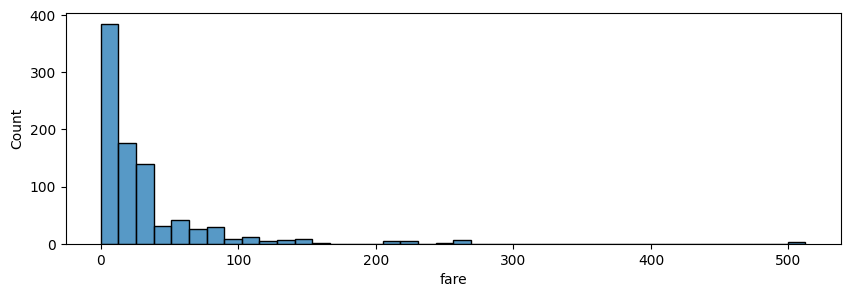

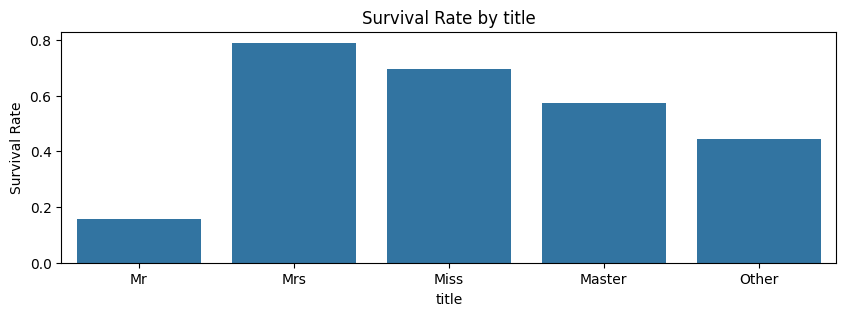

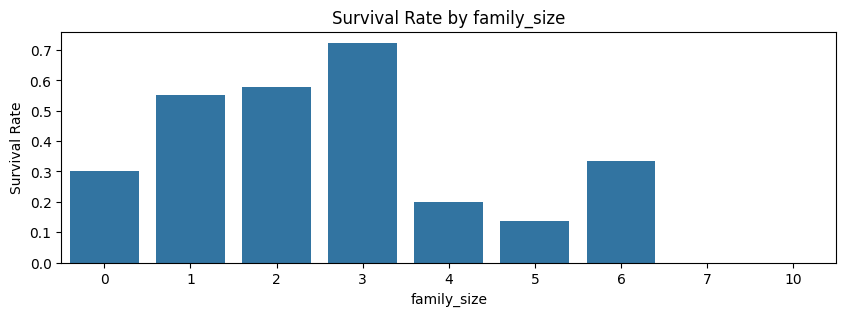

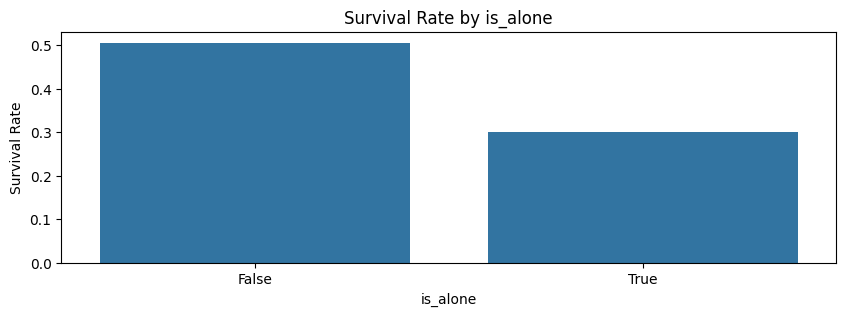

In [260]:
def viz_survived_by_col(df, col):
    plt.figure(figsize=(10, 3))
    if col in ["age", "fare"]:
        sns.histplot(data=df, x=col, bins=40)
        plt.ylabel("Count")
    else:
        sns.barplot(data=df, x=col, y="survived", errorbar=None)
        plt.ylabel("Survival Rate")
        plt.title(f"Survival Rate by {col}")
    plt.xlabel(col)
    plt.show()

def viz_survived_by_cols(df):
    col = df.columns.drop(["survived"])
    for c in col:
        viz_survived_by_col(df, c)

viz_survived_by_cols(df)

### 타이타닉 생존률 분석 결과
1. 남자보다 여자가 생존률이 더 높다.
2. 높은 등급에 탑승한 사람일 수록 생존률이 높다.
3. 가족과 같이 탑승한 사람들이 혼자인 사람보다 생존률이 낮다.
4. 여자 중에서도 결혼한 사람들의 생존률이 높다.
5. 2-30대 연령층의 생존률이 전체 나이대 중에서 가장 높다.